# Fake Job Postings Prediction - Exploratory Data Analysis

## 📊 Project Overview
This notebook contains comprehensive exploratory data analysis (EDA) for the Fake Job Postings Prediction project.

**Objective:** Understand the dataset structure, patterns, and characteristics to inform our machine learning approach.

**Dataset:** Job posting data with text and categorical features to predict fraudulent postings.

---

## Table of Contents
1. [Import Libraries](#import)
2. [Load Data](#load)
3. [Basic Dataset Information](#basic-info)
4. [Missing Value Analysis](#missing)
5. [Target Variable Analysis](#target)
6. [Categorical Features Analysis](#categorical)
7. [Text Features Analysis](#text)
8. [Numerical Features Analysis](#numerical)
9. [Key Insights](#insights)

<a id='import'></a>
## 1. Import Required Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Utilities
import warnings
import sys
import os

# Add src to path for custom modules
sys.path.append('../src')

# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ All libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✅ All libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.3.5


<a id='load'></a>
## 2. Load and Explore the Dataset

In [3]:
# Load training and test datasets
train_df = pd.read_csv('../data/fake_job_postings_train.csv')
test_df = pd.read_csv('../data/fake_job_postings_test.csv')

print("="*80)
print("DATASET LOADED SUCCESSFULLY")
print("="*80)
print(f"\n📊 Training Data Shape: {train_df.shape}")
print(f"📊 Test Data Shape: {test_df.shape}")
print(f"\n✅ Total Features: {train_df.shape[1]}")
print(f"✅ Training Samples: {train_df.shape[0]:,}")
print(f"✅ Test Samples: {test_df.shape[0]:,}")

DATASET LOADED SUCCESSFULLY

📊 Training Data Shape: (9999, 18)
📊 Test Data Shape: (7881, 17)

✅ Total Features: 18
✅ Training Samples: 9,999
✅ Test Samples: 7,881


In [4]:
# Display first few rows
print("\n" + "="*80)
print("FIRST 5 ROWS OF TRAINING DATA")
print("="*80)
train_df.head()


FIRST 5 ROWS OF TRAINING DATA


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,00100eff19844c0190df4c5e11f4c066,Office Manager / HR,"GB, LND,",NaN,NaN,NaN,"Based in the heart of the City, this exception...",You will have previous experience in running a...,Excellent Salaries Company Benefit PackagesInt...,0,1,0,Full-time,NaN,Bachelor's Degree,Retail,NaN,0
1,0012cf527c5740999d1c6545dce5cd95,Director of Account Management,"US, CA, San Francisco",NaN,NaN,NaN,The Director of Account Management brings stro...,8+ years experience in an account management a...,NaN,0,0,1,NaN,NaN,NaN,NaN,NaN,0
2,0013e2bf9f6548c5b214853f9134b005,Brand Manager [Contract position],"US, , Boise",Account team,NaN,Since 1978Our goal has been to create engaging...,Drake Cooper Brand Managers help clients grow ...,Education: BS/BA degree in advertising / mar...,ABOUT DRAKE COOPERWe are a Northwest U.S. adve...,0,1,0,Contract,Associate,Bachelor's Degree,Marketing and Advertising,Advertising,0
3,001493eaf7684ba693d9c1294e12787b,Web Developer,"GR, ,",NaN,NaN,We are a technology focused company with an es...,This position is for a talented PHP/MYSQL/JQue...,"Solid object-oriented design, programming, and...",NaN,0,1,0,Full-time,Mid-Senior level,NaN,E-Learning,NaN,0
4,0014e3ba40af422981a8d30e96a34cb1,Performance Improvement Director,"US, ,",NaN,NaN,NaN,Oversees implementation and operation of Perfo...,Quality-oriented consulting company with a foc...,Full-time position.Quality benefits package of...,0,0,0,Full-time,Director,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


<a id='basic-info'></a>
## 3. Basic Dataset Information

In [5]:
# Dataset shape
print("Training set shape:", train_df.shape)
print("Test set shape:", test_df.shape)
print("\n" + "="*80 + "\n")

# Column information
print("Column Names and Data Types:")
print(train_df.dtypes)
print("\n" + "="*80 + "\n")

# Statistical summary
print("Statistical Summary:")
print(train_df.describe(include='all'))

Training set shape: (9999, 18)
Test set shape: (7881, 17)


Column Names and Data Types:
job_id                 object
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object


Statistical Summary:
                                  job_id                    title  \
count                               9999                     9999   
unique                              9999                     6851   
top     00100eff19844c0190df4c5e11f4c066  English Teacher Abroad    
freq                                   1                  

<a id='missing-values'></a>
## 4. Missing Values Analysis

Missing Values in Training Set:
             Column  Missing_Count  Percentage
       salary_range           8393   83.938394
         department           6388   63.886389
 required_education           4548   45.484548
           benefits           4084   40.844084
required_experience           3960   39.603960
           function           3654   36.543654
           industry           2781   27.812781
    employment_type           1992   19.921992
    company_profile           1885   18.851885
       requirements           1566   15.661566
           location            198    1.980198




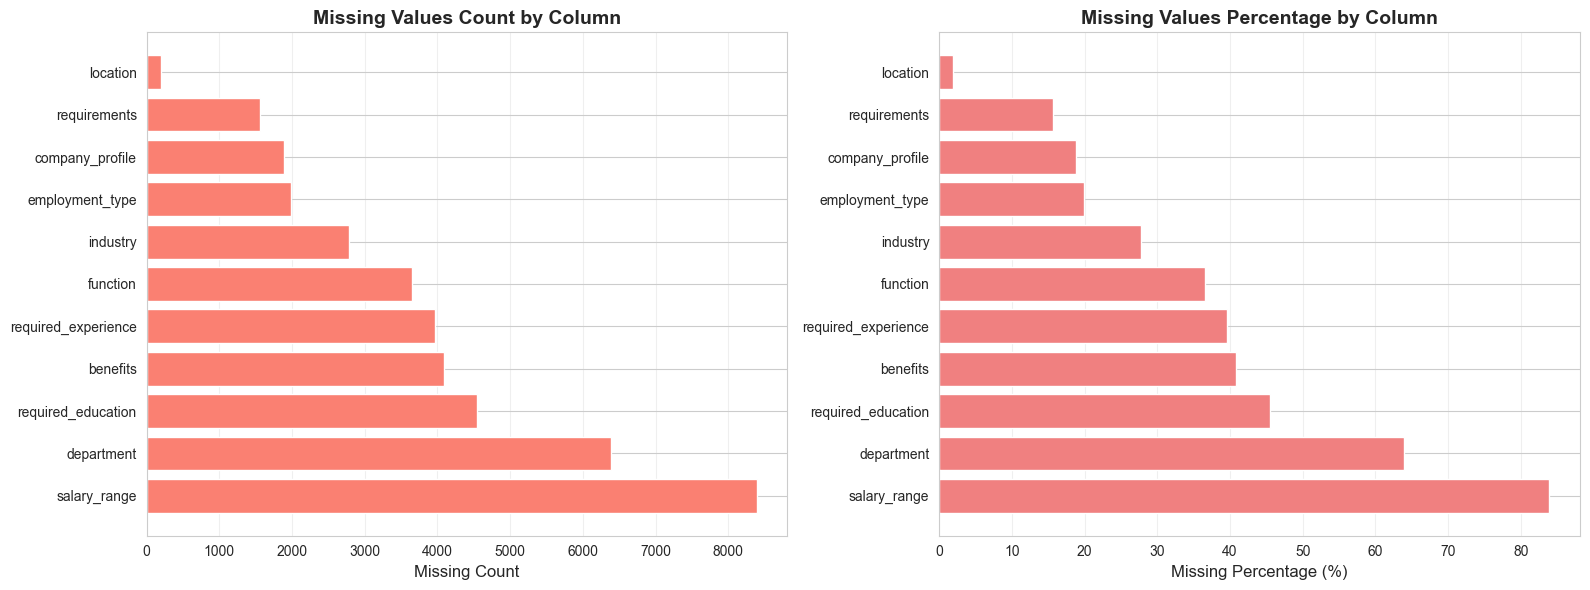

In [6]:
# Calculate missing values
missing_train = train_df.isnull().sum()
missing_percentage_train = (missing_train / len(train_df)) * 100

# Create dataframe for better visualization
missing_df = pd.DataFrame({
    'Column': missing_train.index,
    'Missing_Count': missing_train.values,
    'Percentage': missing_percentage_train.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print("Missing Values in Training Set:")
print(missing_df.to_string(index=False))
print("\n" + "="*80 + "\n")

# Visualize missing values
if len(missing_df) > 0:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Bar plot - count
    ax1.barh(missing_df['Column'], missing_df['Missing_Count'], color='salmon')
    ax1.set_xlabel('Missing Count', fontsize=12)
    ax1.set_title('Missing Values Count by Column', fontsize=14, fontweight='bold')
    ax1.grid(axis='x', alpha=0.3)
    
    # Bar plot - percentage
    ax2.barh(missing_df['Column'], missing_df['Percentage'], color='lightcoral')
    ax2.set_xlabel('Missing Percentage (%)', fontsize=12)
    ax2.set_title('Missing Values Percentage by Column', fontsize=14, fontweight='bold')
    ax2.grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found!")

<a id='target-distribution'></a>
## 5. Target Variable Analysis

Target Variable Distribution:
Legitimate Jobs (0): 9,514 (95.15%)
Fraudulent Jobs (1): 485 (4.85%)

Imbalance Ratio: 1:19.62




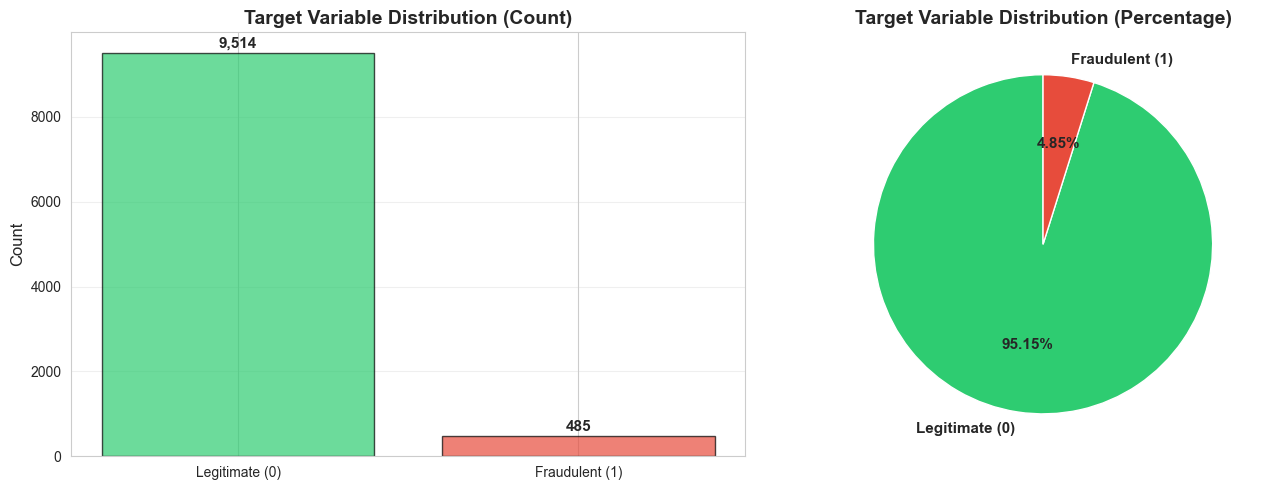

In [7]:
# Count fraudulent vs legitimate jobs
fraud_counts = train_df['fraudulent'].value_counts()
fraud_percentages = train_df['fraudulent'].value_counts(normalize=True) * 100

print("Target Variable Distribution:")
print(f"Legitimate Jobs (0): {fraud_counts[0]:,} ({fraud_percentages[0]:.2f}%)")
print(f"Fraudulent Jobs (1): {fraud_counts[1]:,} ({fraud_percentages[1]:.2f}%)")
print(f"\nImbalance Ratio: 1:{fraud_counts[0]/fraud_counts[1]:.2f}")
print("\n" + "="*80 + "\n")

# Visualize target distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
colors = ['#2ecc71', '#e74c3c']
ax1.bar(['Legitimate (0)', 'Fraudulent (1)'], fraud_counts.values, color=colors, alpha=0.7, edgecolor='black')
ax1.set_ylabel('Count', fontsize=12)
ax1.set_title('Target Variable Distribution (Count)', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
for i, v in enumerate(fraud_counts.values):
    ax1.text(i, v + 50, f'{v:,}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Pie chart
ax2.pie(fraud_counts.values, labels=['Legitimate (0)', 'Fraudulent (1)'], 
        autopct='%1.2f%%', colors=colors, startangle=90, 
        textprops={'fontsize': 11, 'fontweight': 'bold'})
ax2.set_title('Target Variable Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

<a id='categorical-features'></a>
## 6. Categorical Features Analysis

In [9]:
# Define categorical columns
categorical_cols = ['employment_type', 'required_experience', 'required_education', 'industry', 'function']

# Analyze each categorical feature
for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print("="*80)
    value_counts = train_df[col].value_counts()
    print(f"Unique values: {train_df[col].nunique()}")
    print(f"\nTop 10 categories:")
    print(value_counts.head(10))
    print("\n")


EMPLOYMENT_TYPE:
Unique values: 5

Top 10 categories:
employment_type
Full-time    6429
Contract      867
Part-time     441
Temporary     153
Other         117
Name: count, dtype: int64



REQUIRED_EXPERIENCE:
Unique values: 7

Top 10 categories:
required_experience
Mid-Senior level    2165
Entry level         1490
Associate           1252
Not Applicable       624
Internship           218
Director             212
Executive             78
Name: count, dtype: int64



REQUIRED_EDUCATION:
Unique values: 13

Top 10 categories:
required_education
Bachelor's Degree                    2898
High School or equivalent            1155
Unspecified                           796
Master's Degree                       226
Associate Degree                      136
Certification                          79
Some College Coursework Completed      55
Professional                           42
Vocational                             32
Some High School Coursework            13
Name: count, dtype: int64



IN

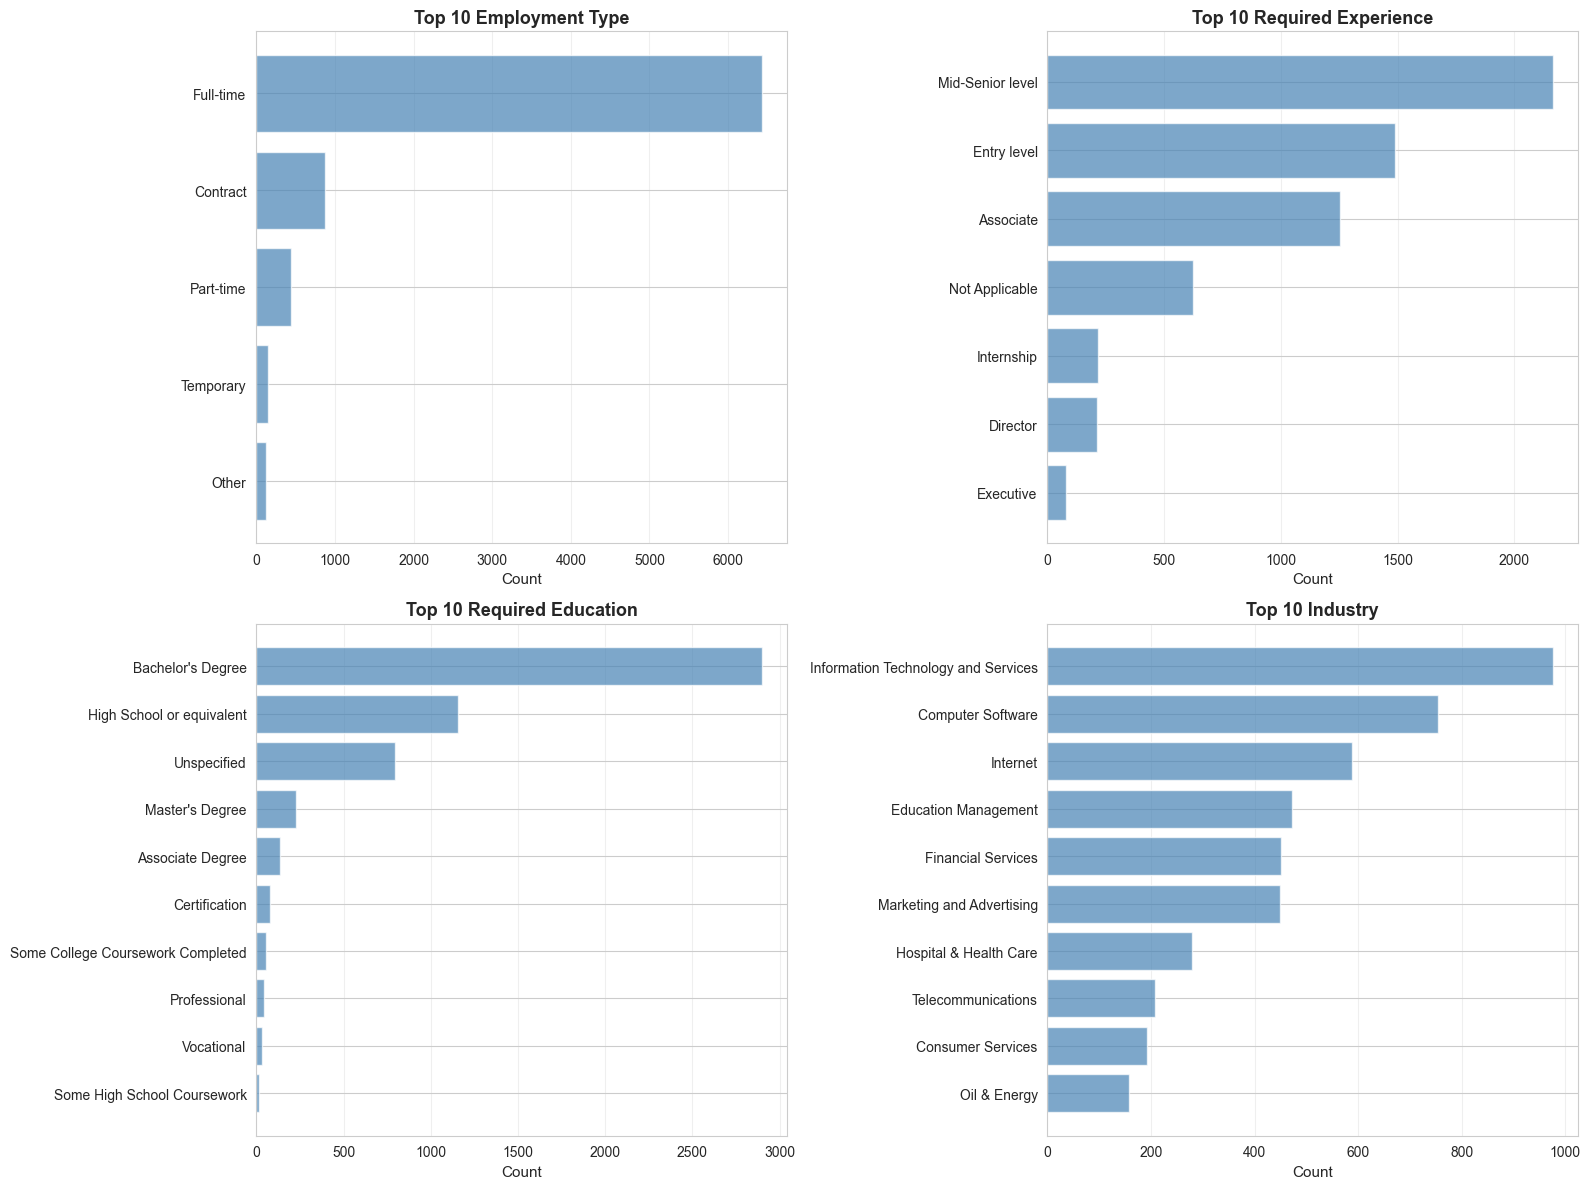

In [10]:
# Visualize top categories for key features
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

features_to_plot = ['employment_type', 'required_experience', 'required_education', 'industry']

for idx, col in enumerate(features_to_plot):
    top_10 = train_df[col].value_counts().head(10)
    axes[idx].barh(range(len(top_10)), top_10.values, color='steelblue', alpha=0.7)
    axes[idx].set_yticks(range(len(top_10)))
    axes[idx].set_yticklabels(top_10.index)
    axes[idx].set_xlabel('Count', fontsize=11)
    axes[idx].set_title(f'Top 10 {col.replace("_", " ").title()}', fontsize=13, fontweight='bold')
    axes[idx].grid(axis='x', alpha=0.3)
    axes[idx].invert_yaxis()

plt.tight_layout()
plt.show()

<a id='binary-features'></a>
## 7. Binary Features Analysis

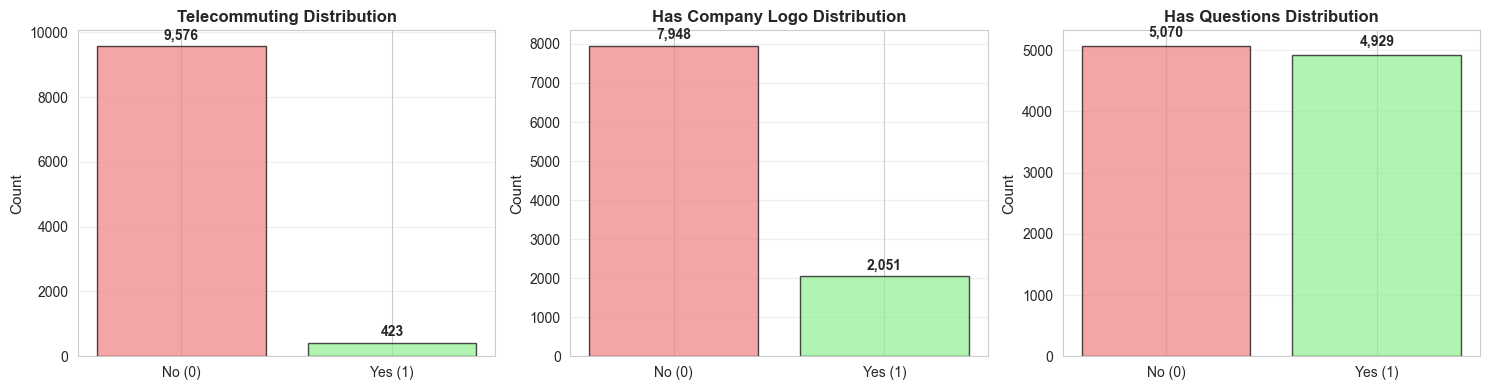


Binary Features Statistics:

telecommuting:
telecommuting
0    9576
1     423
Name: count, dtype: int64
Percentage with value 1: 4.23%

has_company_logo:
has_company_logo
1    7948
0    2051
Name: count, dtype: int64
Percentage with value 1: 79.49%

has_questions:
has_questions
0    5070
1    4929
Name: count, dtype: int64
Percentage with value 1: 49.29%


In [11]:
# Binary features
binary_cols = ['telecommuting', 'has_company_logo', 'has_questions']

# Analyze binary features
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, col in enumerate(binary_cols):
    value_counts = train_df[col].value_counts()
    axes[idx].bar([0, 1], value_counts.values, color=['lightcoral', 'lightgreen'], alpha=0.7, edgecolor='black')
    axes[idx].set_xticks([0, 1])
    axes[idx].set_xticklabels(['No (0)', 'Yes (1)'])
    axes[idx].set_ylabel('Count', fontsize=11)
    axes[idx].set_title(f'{col.replace("_", " ").title()} Distribution', fontsize=12, fontweight='bold')
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Add count labels
    for i, v in enumerate(value_counts.values):
        axes[idx].text(i, v + 100, f'{v:,}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Print statistics
print("\nBinary Features Statistics:")
print("="*80)
for col in binary_cols:
    print(f"\n{col}:")
    print(train_df[col].value_counts())
    print(f"Percentage with value 1: {(train_df[col].sum() / len(train_df)) * 100:.2f}%")

<a id='text-features'></a>
## 8. Text Features Analysis

In [12]:
# Text columns
text_cols = ['title', 'location', 'department', 'salary_range', 'company_profile', 
             'description', 'requirements', 'benefits']

# Calculate text lengths
for col in text_cols:
    train_df[f'{col}_length'] = train_df[col].fillna('').astype(str).apply(len)

# Analyze text length statistics
print("Text Length Statistics:")
print("="*80)
for col in text_cols:
    length_col = f'{col}_length'
    print(f"\n{col.upper()}:")
    print(f"  Mean length: {train_df[length_col].mean():.2f} characters")
    print(f"  Median length: {train_df[length_col].median():.2f} characters")
    print(f"  Max length: {train_df[length_col].max()} characters")
    print(f"  Min length: {train_df[length_col].min()} characters")

Text Length Statistics:

TITLE:
  Mean length: 28.48 characters
  Median length: 25.00 characters
  Max length: 142 characters
  Min length: 3 characters

LOCATION:
  Mean length: 15.32 characters
  Median length: 15.00 characters
  Max length: 161 characters
  Min length: 0 characters

DEPARTMENT:
  Mean length: 3.80 characters
  Median length: 0.00 characters
  Max length: 255 characters
  Min length: 0 characters

SALARY_RANGE:
  Mean length: 1.66 characters
  Median length: 0.00 characters
  Max length: 15 characters
  Min length: 0 characters

COMPANY_PROFILE:
  Mean length: 619.35 characters
  Median length: 564.00 characters
  Max length: 5574 characters
  Min length: 0 characters

DESCRIPTION:
  Mean length: 1222.80 characters
  Median length: 1019.00 characters
  Max length: 14907 characters
  Min length: 6 characters

REQUIREMENTS:
  Mean length: 589.99 characters
  Median length: 464.00 characters
  Max length: 10864 characters
  Min length: 0 characters

BENEFITS:
  Mean le

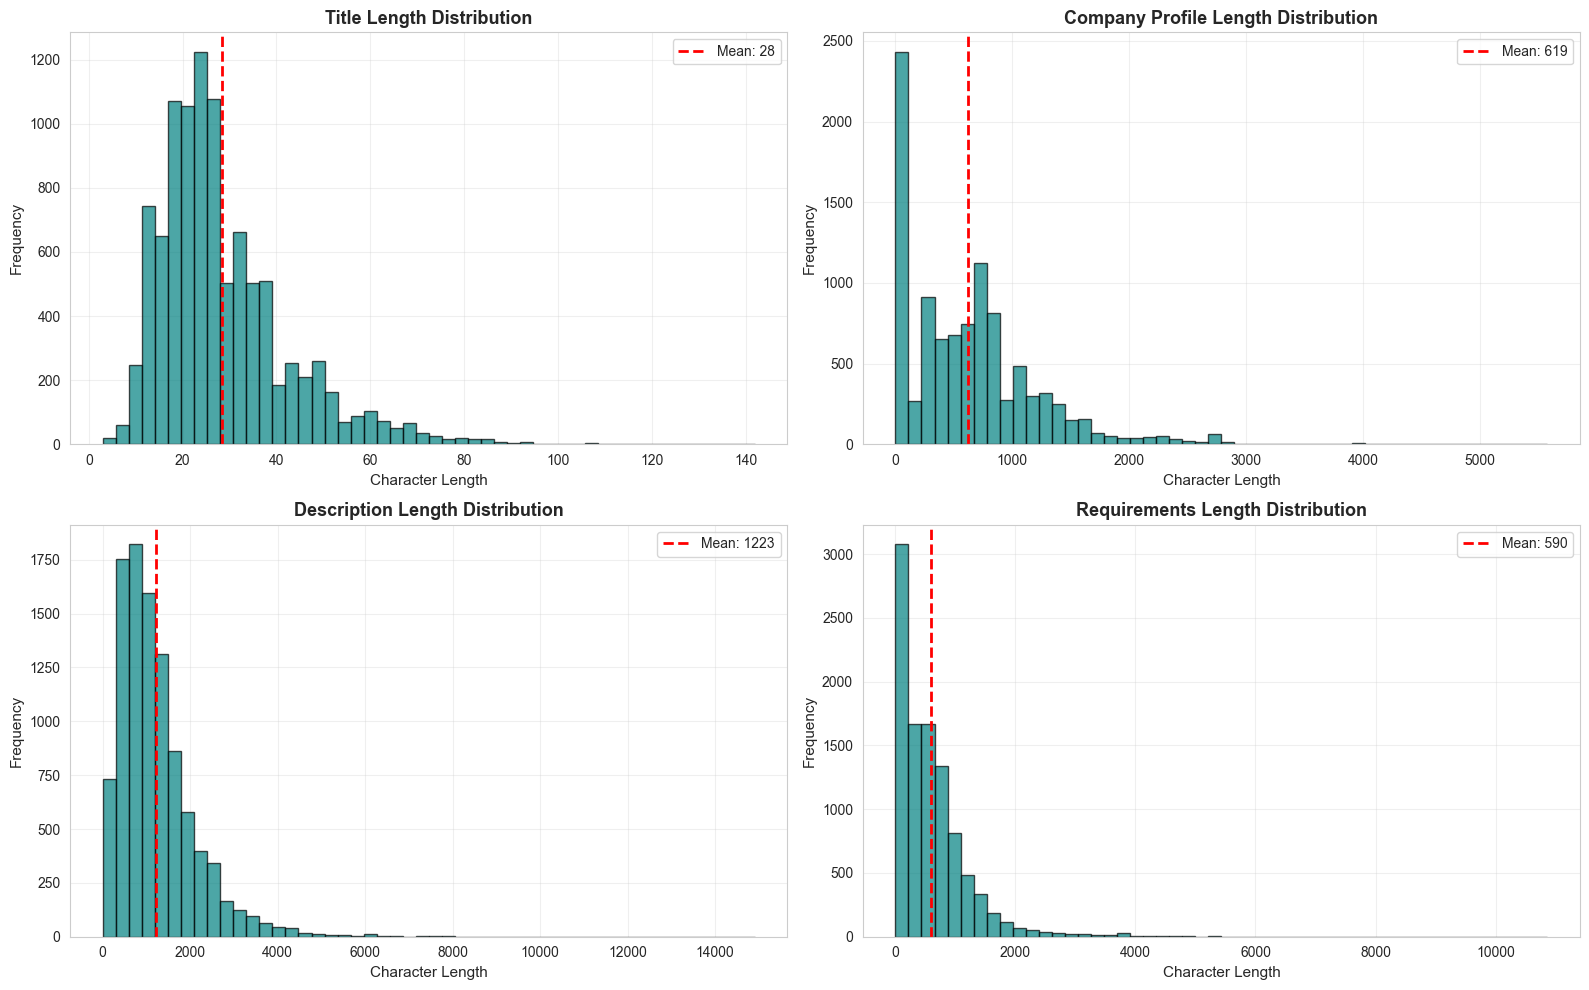

In [13]:
# Visualize text length distributions for key columns
key_text_cols = ['title', 'company_profile', 'description', 'requirements']
length_cols = [f'{col}_length' for col in key_text_cols]

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.ravel()

for idx, (col, length_col) in enumerate(zip(key_text_cols, length_cols)):
    axes[idx].hist(train_df[length_col], bins=50, color='teal', alpha=0.7, edgecolor='black')
    axes[idx].set_xlabel('Character Length', fontsize=11)
    axes[idx].set_ylabel('Frequency', fontsize=11)
    axes[idx].set_title(f'{col.replace("_", " ").title()} Length Distribution', fontsize=13, fontweight='bold')
    axes[idx].axvline(train_df[length_col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {train_df[length_col].mean():.0f}')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

<a id='fraud-comparison'></a>
## 9. Fraudulent vs Legitimate Job Comparison

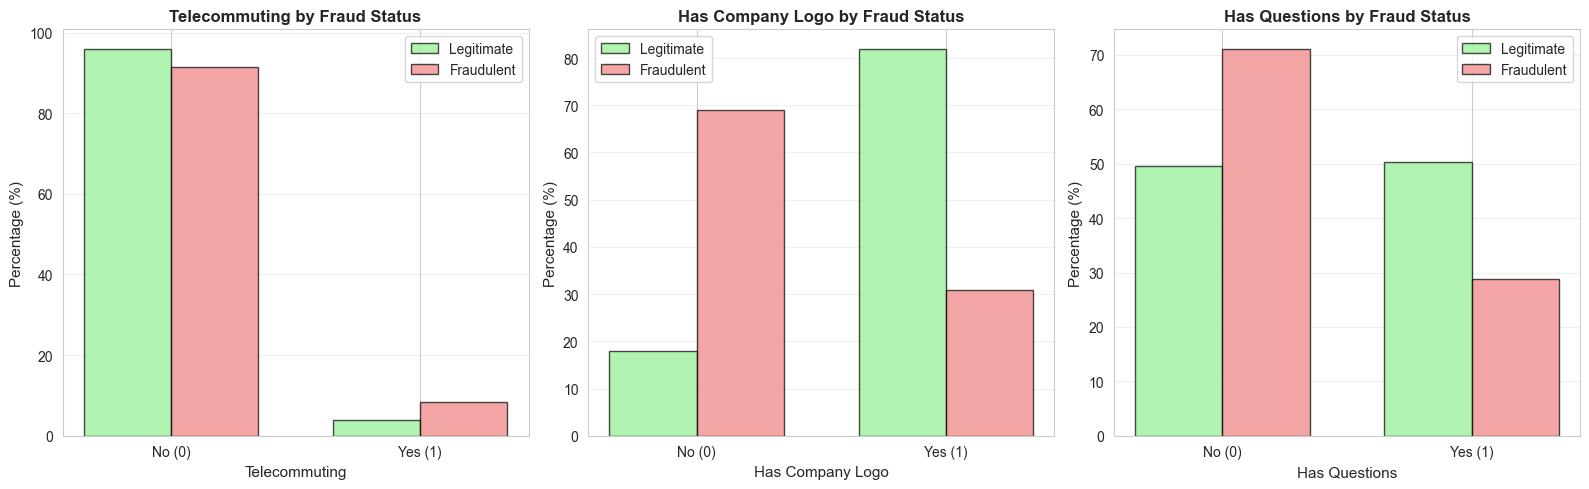

In [14]:
# Compare binary features between fraudulent and legitimate jobs
binary_cols = ['telecommuting', 'has_company_logo', 'has_questions']

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for idx, col in enumerate(binary_cols):
    fraud_yes = train_df[train_df['fraudulent'] == 1][col].value_counts(normalize=True) * 100
    fraud_no = train_df[train_df['fraudulent'] == 0][col].value_counts(normalize=True) * 100
    
    x = np.arange(2)
    width = 0.35
    
    axes[idx].bar(x - width/2, [fraud_no.get(0, 0), fraud_no.get(1, 0)], width, 
                  label='Legitimate', color='lightgreen', alpha=0.7, edgecolor='black')
    axes[idx].bar(x + width/2, [fraud_yes.get(0, 0), fraud_yes.get(1, 0)], width, 
                  label='Fraudulent', color='lightcoral', alpha=0.7, edgecolor='black')
    
    axes[idx].set_xlabel(col.replace('_', ' ').title(), fontsize=11)
    axes[idx].set_ylabel('Percentage (%)', fontsize=11)
    axes[idx].set_title(f'{col.replace("_", " ").title()} by Fraud Status', fontsize=12, fontweight='bold')
    axes[idx].set_xticks(x)
    axes[idx].set_xticklabels(['No (0)', 'Yes (1)'])
    axes[idx].legend()
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

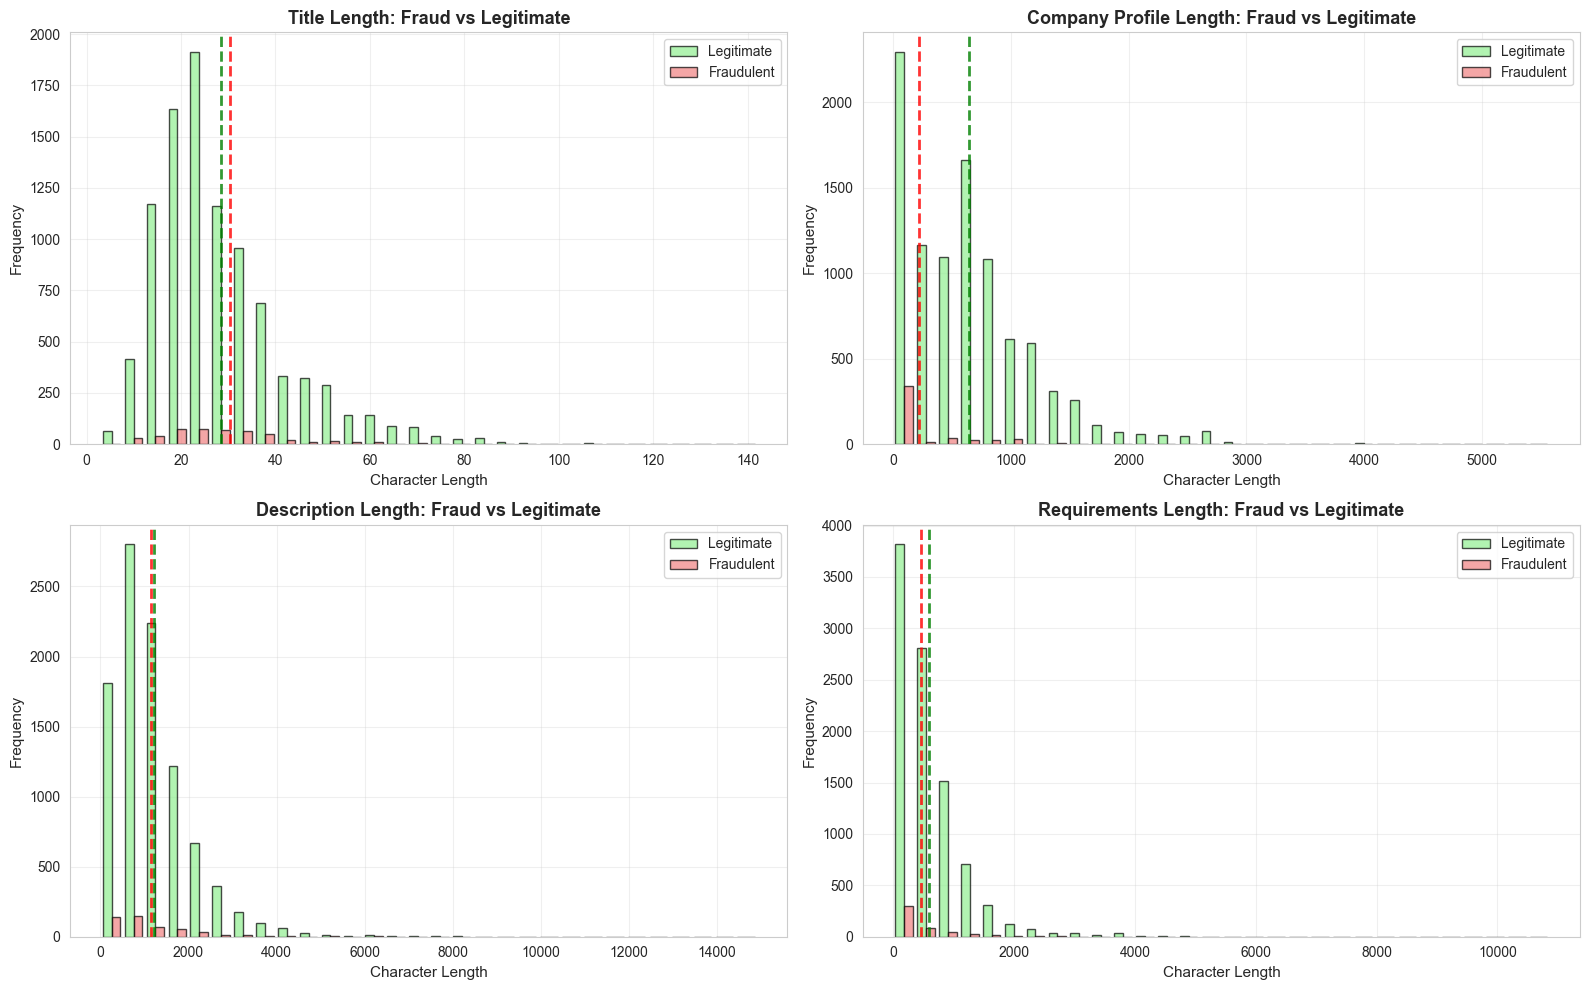


Text Length Comparison (Fraudulent vs Legitimate):

TITLE:
  Legitimate mean: 28.38 characters
  Fraudulent mean: 30.41 characters
  Difference: 2.03 characters

COMPANY_PROFILE:
  Legitimate mean: 639.86 characters
  Fraudulent mean: 217.02 characters
  Difference: 422.83 characters

DESCRIPTION:
  Legitimate mean: 1226.65 characters
  Fraudulent mean: 1147.20 characters
  Difference: 79.45 characters

REQUIREMENTS:
  Legitimate mean: 596.91 characters
  Fraudulent mean: 454.18 characters
  Difference: 142.73 characters


In [15]:
# Compare text lengths between fraudulent and legitimate jobs
key_text_cols = ['title', 'company_profile', 'description', 'requirements']
length_cols = [f'{col}_length' for col in key_text_cols]

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.ravel()

for idx, (col, length_col) in enumerate(zip(key_text_cols, length_cols)):
    legitimate = train_df[train_df['fraudulent'] == 0][length_col]
    fraudulent = train_df[train_df['fraudulent'] == 1][length_col]
    
    axes[idx].hist([legitimate, fraudulent], bins=30, label=['Legitimate', 'Fraudulent'], 
                   color=['lightgreen', 'lightcoral'], alpha=0.7, edgecolor='black')
    axes[idx].set_xlabel('Character Length', fontsize=11)
    axes[idx].set_ylabel('Frequency', fontsize=11)
    axes[idx].set_title(f'{col.replace("_", " ").title()} Length: Fraud vs Legitimate', fontsize=13, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)
    
    # Add mean lines
    axes[idx].axvline(legitimate.mean(), color='green', linestyle='--', linewidth=2, alpha=0.8, 
                     label=f'Legit Mean: {legitimate.mean():.0f}')
    axes[idx].axvline(fraudulent.mean(), color='red', linestyle='--', linewidth=2, alpha=0.8,
                     label=f'Fraud Mean: {fraudulent.mean():.0f}')

plt.tight_layout()
plt.show()

# Print comparison statistics
print("\nText Length Comparison (Fraudulent vs Legitimate):")
print("="*80)
for col, length_col in zip(key_text_cols, length_cols):
    legitimate_mean = train_df[train_df['fraudulent'] == 0][length_col].mean()
    fraudulent_mean = train_df[train_df['fraudulent'] == 1][length_col].mean()
    print(f"\n{col.upper()}:")
    print(f"  Legitimate mean: {legitimate_mean:.2f} characters")
    print(f"  Fraudulent mean: {fraudulent_mean:.2f} characters")
    print(f"  Difference: {abs(legitimate_mean - fraudulent_mean):.2f} characters")

<a id='location-analysis'></a>
## 10. Location Analysis

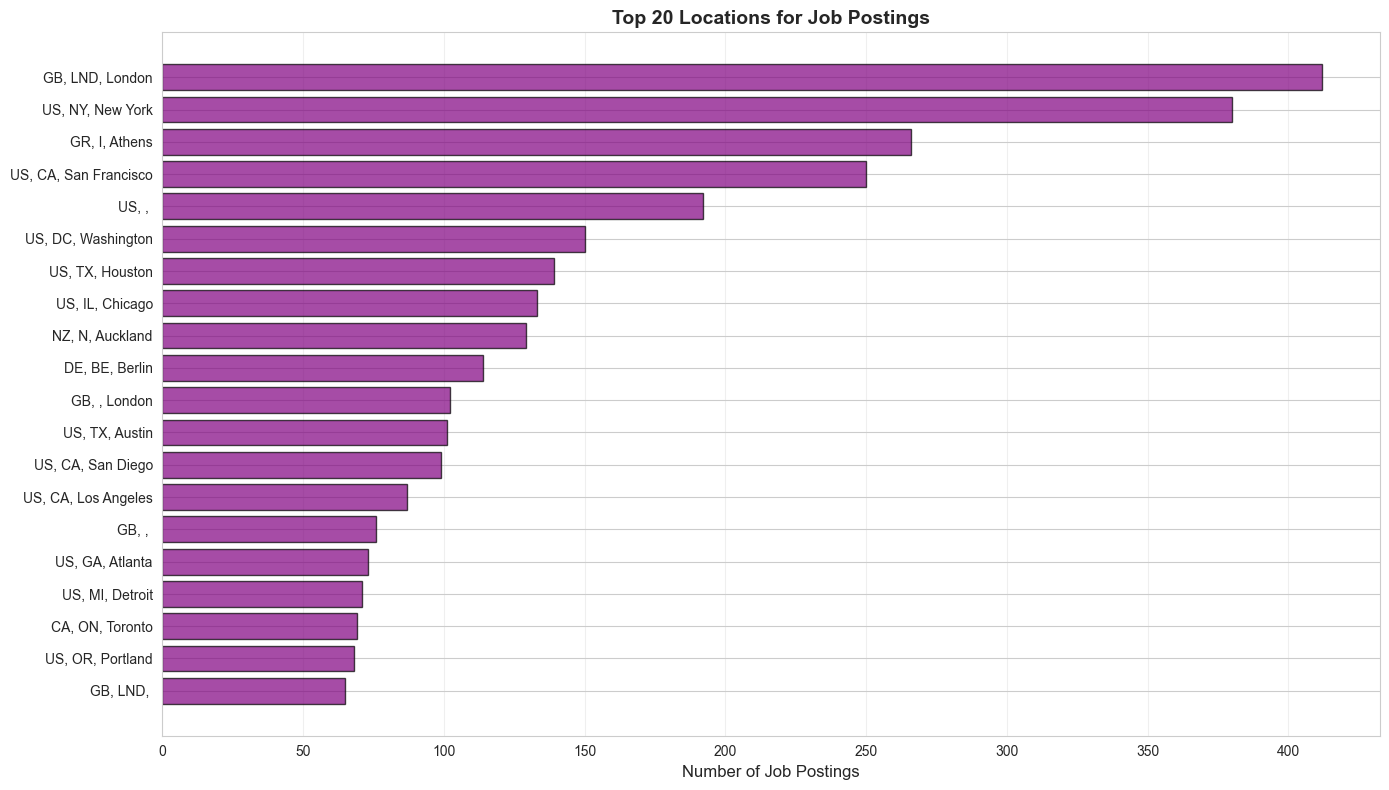


Top 20 Locations:
location
GB, LND, London          412
US, NY, New York         380
GR, I, Athens            266
US, CA, San Francisco    250
US, ,                    192
US, DC, Washington       150
US, TX, Houston          139
US, IL, Chicago          133
NZ, N, Auckland          129
DE, BE, Berlin           114
GB, , London             102
US, TX, Austin           101
US, CA, San Diego         99
US, CA, Los Angeles       87
GB, ,                     76
US, GA, Atlanta           73
US, MI, Detroit           71
CA, ON, Toronto           69
US, OR, Portland          68
GB, LND,                  65
Name: count, dtype: int64


In [16]:
# Analyze top locations
top_locations = train_df['location'].value_counts().head(20)

plt.figure(figsize=(14, 8))
plt.barh(range(len(top_locations)), top_locations.values, color='purple', alpha=0.7, edgecolor='black')
plt.yticks(range(len(top_locations)), top_locations.index)
plt.xlabel('Number of Job Postings', fontsize=12)
plt.title('Top 20 Locations for Job Postings', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nTop 20 Locations:")
print("="*80)
print(top_locations)

<a id='insights'></a>
## 11. Key Insights and Observations

### Summary of Key Findings:

1. **Class Imbalance**: The dataset is highly imbalanced with fraudulent jobs being a minority class. This will require handling through:
   - SMOTE (Synthetic Minority Over-sampling Technique)
   - Class weights in models
   - Appropriate evaluation metrics (Precision, Recall, F1-Score, ROC-AUC)

2. **Missing Values**: Several columns have significant missing data, particularly:
   - Text columns (department, salary_range, company_profile, description, requirements, benefits)
   - Categorical columns (employment_type, required_experience, required_education, industry, function)
   - This requires careful imputation strategies

3. **Text Features**: 
   - Job descriptions and requirements vary greatly in length
   - Text length differences between fraudulent and legitimate postings could be informative features
   - NLP techniques (TF-IDF, word embeddings) will be crucial

4. **Binary Features**:
   - `has_company_logo`, `has_questions`, and `telecommuting` show different distributions between fraud classes
   - These could be strong predictive features

5. **Categorical Features**:
   - High cardinality in columns like `location`, `industry`, and `function`
   - Will require encoding strategies (Label Encoding, One-Hot Encoding, or Target Encoding)

6. **Feature Engineering Opportunities**:
   - Text length features (already calculated)
   - Word count, special character counts
   - Presence/absence indicators for text fields
   - Interaction features between categorical variables

7. **Next Steps**:
   - Data preprocessing and cleaning
   - Feature engineering (text features, categorical encoding)
   - Handle class imbalance
   - Build baseline models
   - Experiment with ensemble methods and deep learning approaches